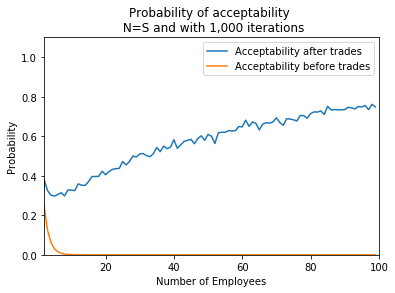

In [38]:
import numpy as np
import math
import random
from copy import copy, deepcopy
import pandas as pd  
from matplotlib import pyplot as plt


def runcycle(x):
    n = x
    s = x

    employees = [[random.uniform(0,2) for i in range(n)] for j in range(s)]

    trades = 0
    for i in range(n):
        for j in range(s):
            if employees[i][i] > employees[i][j]:
                if employees[j][i]< employees[j][j]:
                    temp1=employees[i][j]
                    temp2=employees[j][i]
                    employees[i][j]=employees[i][i]
                    employees[j][i]=employees[j][j]
                    employees[i][i]=temp1
                    employees[j][j]=temp2
                    trades+=1


    return employees

def acceptability(employees, x):
    for i in range(x):
        if employees[i][i]>1:
            return 0
    return 1

def main():
    
#     print(sum/n)
    limit_emp = 100

    x=np.arange(2,limit_emp, 1)
    y1= (1/2)**x        
    
    iterations=1000
  
    acceptability_counter = [0]*limit_emp
    
    for _iter in range(iterations):
        for _x in range(2,limit_emp,1):
            acceptability_counter[_x]+=acceptability(runcycle(_x), _x)
        
    for item in range(len(acceptability_counter)):
            acceptability_counter[item]=acceptability_counter[item]/iterations

    plt.plot(acceptability_counter, label='Acceptability after trades')
    plt.plot(x,(1/2)**x, label='Acceptability before trades')
    plt.title('Probability of acceptability \n N=S and with 1,000 iterations')
    plt.xlabel('Number of Employees')
    plt.ylabel('Probability')
    plt.xlim([2, 100])
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
main()
